In [46]:
%matplotlib inline
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

In [28]:
df = pd.read_csv('all.csv')

In [29]:
df.benchmark.unique()

array(['stressng-stream', 'redisbench', 'stressng-cpu',
       'stressng-cpucache', 'stressng-mem'], dtype=object)

In [31]:
# get stream results
dfredis = df.query('benchmark == "stressng-stream" or benchmark == "redisbench"')

Let's look at STREAM results:

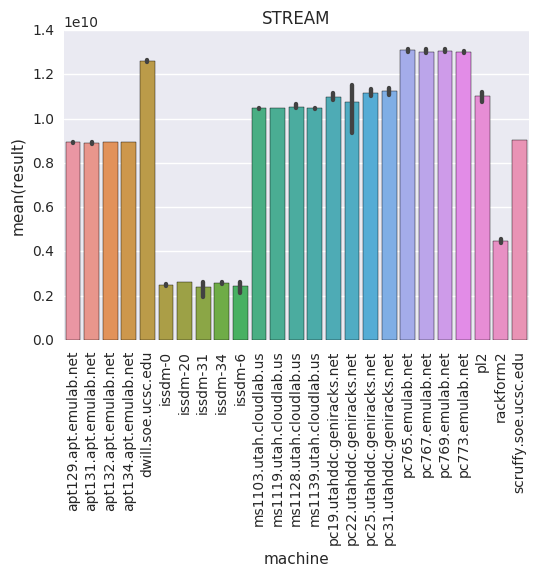

In [38]:
sns.barplot(x='machine', y='result', data=dfredis.query('benchmark == "stressng-stream"'))
plt.xticks(rotation=90)
sns.plt.title("STREAM")

We observe low variability in general (a couple of machines seem to be unstable). Now let's look at the results of the redis benchmark normalized w.r.t. to STREAM.

In [45]:
# stressng-stream is in MB/s
# redisbench is in ops/s (with each op being 8 bytes)
def get_mb_ps(row):
    if row['benchmark'] == 'stressng-stream':
        return row['result'] / (1024 * 1024)
    else:
        return (row['result'] * 8) / (1024 * 1024)
    
def get_slowdown(row):
    base = dfredis.query('benchmark == "stressng-stream" and machine == "' + row['machine'] + '"')['MB/s'].mean()
    return 1 / (row['MB/s'] / float(base))

dfredis['MB/s'] = dfredis.apply(get_mb_ps, axis=1)
dfredis['slowdown'] = dfredis.apply(get_slowdown, axis=1)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


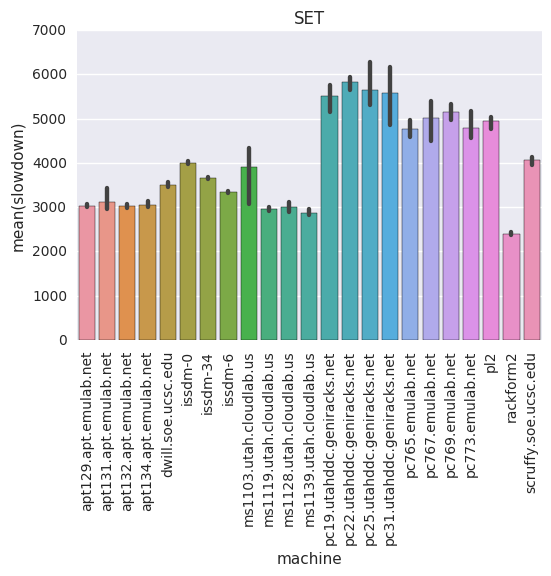

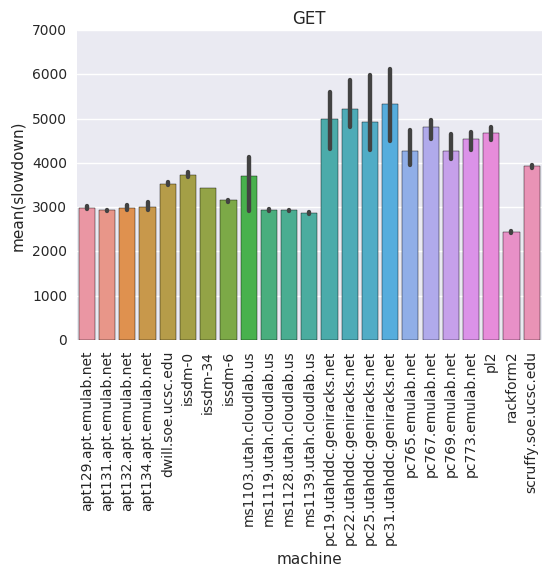

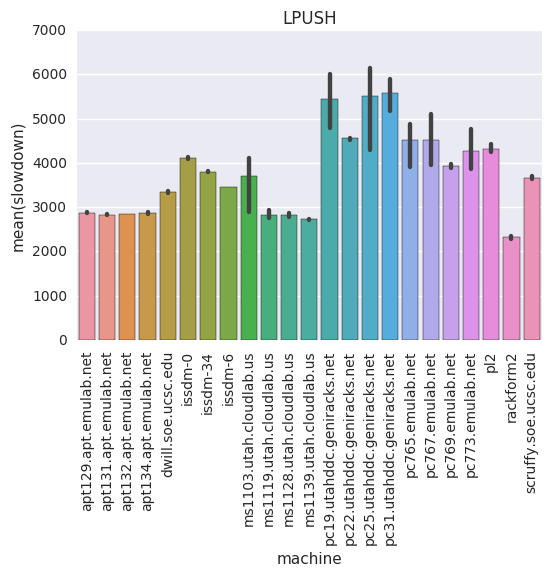

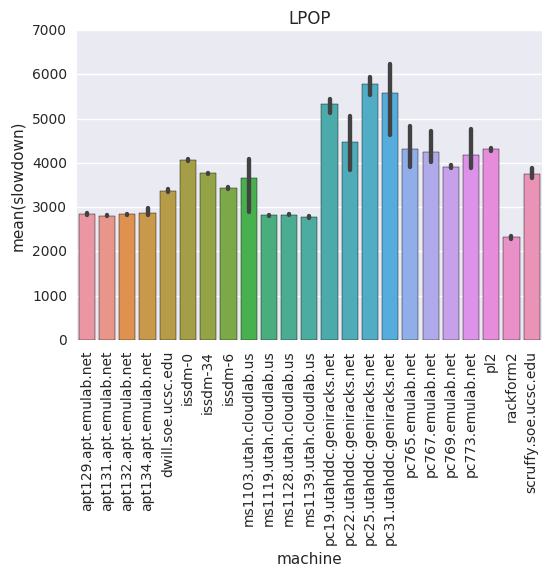

In [36]:
for b in dfredis['test'].unique():
    if b == 'raw':
        continue
    sns.barplot(x='machine', y='slowdown', data=dfredis.query('test == "' + b + '"'))
    plt.xticks(rotation=90)
    sns.plt.title(b)
    plt.show()